<a href="https://colab.research.google.com/github/QPeiran/age_gender_ethnic_insight/blob/master/incom_gdp_corelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
project_id = 'countdownintervewtest'

In [3]:
#import the data we need
import pandas as pd

sample_count = 2000
df = pd.io.gbq.read_gbq('''
WITH age_count_income AS (
SELECT census.Region, Age, count, Median_income FROM `countdownintervewtest.data_model.model_census_data` AS census
LEFT JOIN `countdownintervewtest.data_model.model_income_data` AS income
ON (census.Age_group = income.Age_GRoup
AND census.Region = income.Region)
)
SELECT Median_income, Age, count, GDP__million_ as gdp, age_count_income.Region
FROM age_count_income
LEFT JOIN `countdownintervewtest.data_model.model_regional_gdp` AS gdp
ON (age_count_income.Region = gdp.Region)
''', project_id=project_id, dialect='standard')

df.head()

,Median_income,Age,count,gdp,Region
0,248,15,19908,107745,Auckland Region
1,264,15,3972,15833,Bay of Plenty Region
2,278,15,5982,23914,Waikato Region
3,495,15,2283,7415,Northland Region
4,363,15,2151,9859,Nelson/Tasman/Marlborough/West Coast Regions


In [4]:
df.describe()

,Median_income,Age,count,gdp
count,660.000000,660.000000,660.000000,660.000000
mean,917.075758,42.000000,4984.381818,23722.916667
std,257.562893,15.886548,5244.572229,27310.199651
min,208.000000,15.000000,939.000000,5826.000000
25%,781.750000,28.000000,2200.500000,9428.250000
50%,969.500000,42.000000,2979.000000,11683.500000
75%,1101.500000,56.000000,5991.000000,26783.500000
max,1381.000000,69.000000,27672.000000,107745.000000


In [5]:
df.corr()

,Median_income,Age,count,gdp
Median_income,1.000000,3.887003e-01,0.159141,1.657662e-01
Age,0.388700,1.000000e+00,-0.065102,1.221495e-18
count,0.159141,-6.510150e-02,1.000000,9.679805e-01
gdp,0.165766,1.221495e-18,0.967980,1.000000e+00


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


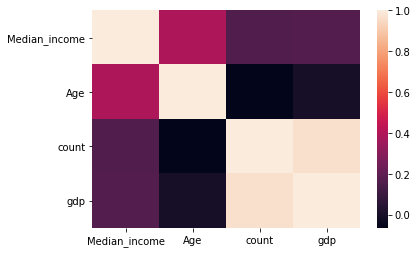

In [6]:
#quick visual review of the imported data
import seaborn as sns
# plot the heatmap
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to c

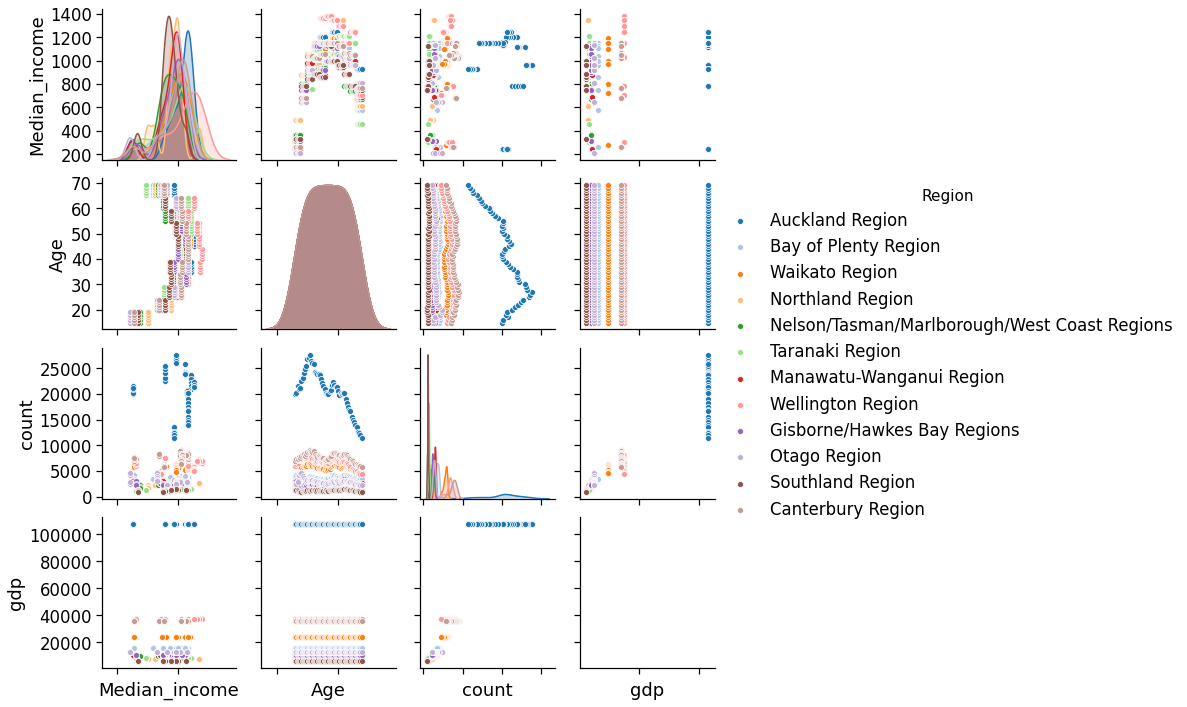

In [7]:
#pair plot for ref
with sns.plotting_context("notebook",font_scale=1.5):
    g = sns.pairplot(df, hue='Region', palette='tab20')
g.set(xticklabels=[]);

In [0]:
# As expected "count" has a great correlation with gdp whereas "age" has nothing to do with the gdp
# However, what we want to uderstand is whether the "income" has correlaiton with others. 
# It looks like the answer is affirmative but the correaltion is not strong. By comparision, the "median income" has stronger correlation to "age" other than "count" and "gdp"

In [0]:
# meadian_income VS Age
import matplotlib.pyplot as plt
from scipy import stats

meadian_income = df['Median_income']
age = df['Age']
local_labour_count_by_age = df['count']
local_gdp = df['gdp']

slope: 6.301858    intercept: 652.397727 r-value: 0.388700 
R-squared: 0.151088 p-value: 0.000000


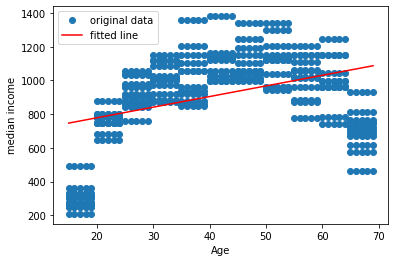

In [10]:
# Question: what is the correlation between income and age?
slope, intercept, r_value, p_value, std_err = stats.linregress(age, meadian_income)
print("slope: %f    intercept: %f r-value: %f " % (slope, intercept, r_value))

print("R-squared: %f p-value: %f" % (r_value**2, p_value) )

plt.xlabel("Age")
plt.ylabel("median income")
plt.plot(age, meadian_income, 'o', label='original data')
plt.plot(age, intercept + slope*age, 'r', label='fitted line')
plt.legend()
plt.show()
# only 15% variance can be interpertered by age

slope: 0.007815    intercept: 878.120348 r-value: 0.159141 
R-squared: 0.025326 p-value: 0.000040


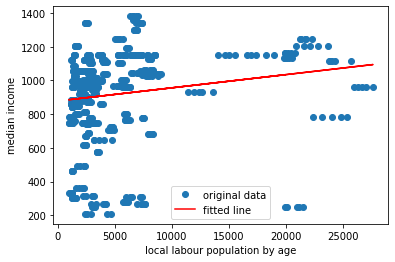

In [11]:
# Question: what is the correlation between income and how many people at the same age avaliable in the local market?
slope, intercept, r_value, p_value, std_err = stats.linregress(local_labour_count_by_age, meadian_income)
print("slope: %f    intercept: %f r-value: %f " % (slope, intercept, r_value))

print("R-squared: %f p-value: %f" % (r_value**2, p_value) )

plt.xlabel("local labour population by age")
plt.ylabel("median income")
plt.plot(local_labour_count_by_age, meadian_income, 'o', label='original data')
plt.plot(local_labour_count_by_age, intercept + slope*local_labour_count_by_age, 'r', label='fitted line')
plt.legend()
plt.show()
# only 2.5% variance can be interpertered by local_labour_count_by_age

slope: 0.001563    intercept: 879.988685 r-value: 0.165766 
R-squared: 0.027478 p-value: 0.000019


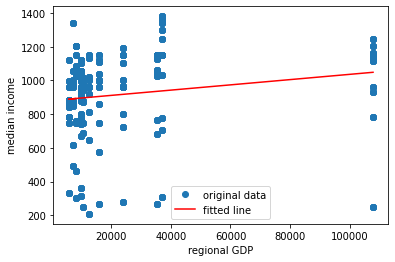

In [12]:
#Question: Does local gdp affect local income?
slope, intercept, r_value, p_value, std_err = stats.linregress(local_gdp, meadian_income)
print("slope: %f    intercept: %f r-value: %f " % (slope, intercept, r_value))

print("R-squared: %f p-value: %f" % (r_value**2, p_value) )

plt.xlabel("regional GDP")
plt.ylabel("median income")
plt.plot(local_gdp, meadian_income, 'o', label='original data')
plt.plot(local_gdp, intercept + slope*local_gdp, 'r', label='fitted line')
plt.legend()
plt.show()
# only 2.7% variance can be interpertered by local_gdp

In [0]:
!pip install -q statsmodels

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
#print("regression score: %d    coefficients: %d intercept: %d "  %(1,2,3)) #reg.score(X,Y), reg.coef_, reg.intercept_
print(reg.score(X,Y))

0.18835647070563377


In [16]:
from pandas import DataFrame
import statsmodels.api as sm


X = df[['Age','count','gdp']]
Y = df['Median_income']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:          Median_income   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     50.75
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.67e-29
Time:                        10:37:56   Log-Likelihood:                -4531.0
No. Observations:                 660   AIC:                             9070.
Df Residuals:                     656   BIC:                             9088.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        585.7022     28.781     20.350      0.0